In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#Read file of joined Yelp Business & Review data
data = pd.read_csv('../Output_folder/3_table.csv')
data.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'}
1,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47,Helena Avenue Bakery,...,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
2,2u5Skti5mZam_-XTKPelvA,IMd3NQbclta91pFKk3AJZg,qO9dNNIvNbCBd8ZgjxMxgQ,5,0,0,0,"Farmhouse, rustic, chic.Helpful staff with gre...",2017-04-08 00:33:11,HOME Santa Barbara,...,CA,93101,34.414912,-119.694171,4.5,13,1,"{'WheelchairAccessible': 'True', 'BikeParking'...","Home & Garden, Furniture Stores, Home Decor, S...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
3,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5,0,0,0,We were a bit weary about trying the Shellfish...,2016-05-31 02:14:54,Santa Barbara Shellfish Company,...,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
4,HuWEnZr7-0HveaqXxyywgg,Eb8LgZArKmW0KgW6lTni-w,YbnJYHNp_fHbI-hcFg48vQ,5,2,0,2,The kayaking tour at the Santa Cruz Island was...,2009-08-03 21:55:27,Santa Barbara Adventure Company,...,CA,93101,34.417681,-119.694349,5.0,195,1,"{'GoodForKids': 'True', 'DogsAllowed': 'True',...","Tours, Boating, Hotels & Travel, Rafting/Kayak...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


In [2]:
data.dtypes

review_id        object
user_id          object
business_id      object
stars_x           int64
useful            int64
funny             int64
cool              int64
text             object
date             object
name             object
address          object
city             object
state            object
postal_code       int64
latitude        float64
longitude       float64
stars_y         float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [4]:
df = data[['review_id','text','stars_x']]
df.head()

,review_id,text,stars_x
0,pUycOfUwM8vqX7KjRRhUEA,Had a party of 6 here for hibachi. Our waitres...,3
1,L0jv8c2FbpWSlfNC6bbUEA,What a great addition to the Funk Zone! Grab ...,5
2,2u5Skti5mZam_-XTKPelvA,"Farmhouse, rustic, chic.Helpful staff with gre...",5
3,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...,5
4,HuWEnZr7-0HveaqXxyywgg,The kayaking tour at the Santa Cruz Island was...,5


In [5]:
df.shape

(2346, 3)

In [13]:
df=df.dropna()
df = df.reset_index(drop=True)
df.head()

,review_id,text,stars_x,stars,label
0,L0jv8c2FbpWSlfNC6bbUEA,What a great addition to the Funk Zone! Grab ...,5,5,1
1,2u5Skti5mZam_-XTKPelvA,"Farmhouse, rustic, chic.Helpful staff with gre...",5,5,1
2,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...,5,5,1
3,HuWEnZr7-0HveaqXxyywgg,The kayaking tour at the Santa Cruz Island was...,5,5,1
4,GK5JEpizD-nDGXsJUYVLTg,The court house is very old and the art is gre...,4,4,1


In [14]:
df.shape

(2105, 5)

In [15]:
# Label the 4 & 5 star reviews as positive ('1') and 
# label the 1 & 2 star reviews as negative ('0'). 
# Drop the 3 star reviews as they are neutral

df['stars']=df['stars_x'].astype(int) #convert stars column to int

#df=df[df['stars']!=3] #Drop 3-star reviews
df['label']=np.where(df['stars']>=4,1,0) #1-Positive, 0-Negative

df.head()

,review_id,text,stars_x,stars,label
0,L0jv8c2FbpWSlfNC6bbUEA,What a great addition to the Funk Zone! Grab ...,5,5,1
1,2u5Skti5mZam_-XTKPelvA,"Farmhouse, rustic, chic.Helpful staff with gre...",5,5,1
2,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...,5,5,1
3,HuWEnZr7-0HveaqXxyywgg,The kayaking tour at the Santa Cruz Island was...,5,5,1
4,GK5JEpizD-nDGXsJUYVLTg,The court house is very old and the art is gre...,4,4,1


In [16]:
df.shape

(2105, 5)

In [26]:
f = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:2300]
data=data.append(df[df['label']==1][:10000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data


1    1754
0     351
Name: label, dtype: int64

,review_id,text,stars_x,stars,label
0,zM7u3iffMjniyvQAaN9Tnw,So disappointing on so many levels. Have been ...,1,1,0
1,EHPGNBfnS7pZTyOwgEczsg,I had a delicious breakfast at Tuttini a few m...,2,2,0
2,_Ub20uO1MKy4XOVPOdzpqw,"Sat down over a half hour, only miso and drink...",1,1,0
3,MhCgIdMwdUjeDIZvCgGxmw,Worst nail salon experience ever. The guy said...,1,1,0
4,NoPOfj7gC1l48dC0XH7Spw,"I went in when they had 4 people working, wait...",1,1,0
...,...,...,...,...,...
2100,CmWY4YJNNYAZ4RClnGS9QQ,"This is my first time, Great place nice food a...",5,5,1
2101,dR-V0xtwPMP6ggbhjuxHKQ,Delicious food! Cold beer! Great staff!\nMy on...,4,4,1
2102,e130OlBIgHDO-2KqiWSbDA,WiFi? Cider? Food? Dog friendly? Great service...,5,5,1
2103,avAsbVWsLmXszusNkCW2Rg,"Great food. Full of locals. Clean, fast and fr...",5,5,1


In [27]:
# Convert all reviews into the lower case
data['pre_process'] = data['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [28]:
# Perform the Contractions on the reviews text, eg 'it won't be' becomes 'it will not be'
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [29]:
# Remove non-alpha characters
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [30]:
# Remove the extra spaces between the words
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))


In [31]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [32]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [33]:
post_process = data['pre_process']

print(post_process)

0       disappointing many level coming year quality f...
1       delicious breakfast tuttini month ago went bac...
2       sat half hour miso drink served waiting actual...
3       worst nail salon experience ever guy said wron...
4       went people working waited minute tea latte ca...
                              ...                        
2100    first time great place nice food drink two thu...
2101    delicious food cold beer great staff complaint...
2102    wifi cider food dog friendly great service yes...
2103    great food full local clean fast fresh food re...
2104    family coming generation hope one day bring il...
Name: pre_process, Length: 2105, dtype: object


In [34]:
data.dtypes

review_id      object
text           object
stars_x         int64
stars           int32
label           int32
pre_process    object
dtype: object

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (1578,) (1578,) Test:  ((527,), (527,))


In [36]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [37]:
# Implementing SVM with sklearn for classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [38]:
# Fitting the Training data into model
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=0)

In [39]:
data.dtypes

review_id      object
text           object
stars_x         int64
stars           int32
label           int32
pre_process    object
dtype: object

In [40]:
# Predicting the Test data
y_test_pred=clf.predict(tf_x_test)

<AxesSubplot:>

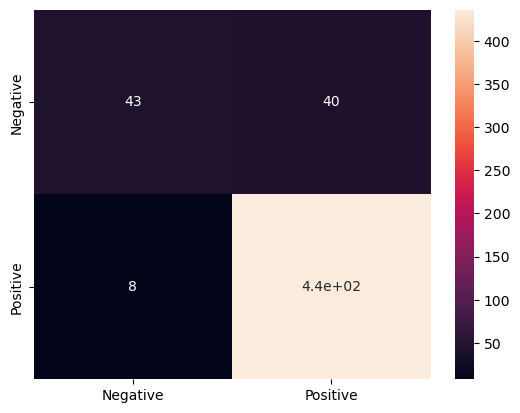

In [41]:
from sklearn import metrics
import seaborn as sns
#pred = voting.predict(x_test_tfidf)
cm=metrics.confusion_matrix(y_test, y_test_pred)
cm = pd.DataFrame(cm, index = ["Negative", "Positive"], columns=["Negative", "Positive"])
sns.heatmap(cm, annot = True)
#plt.title("Confusion Matrix for Reviews Classifier")

In [42]:
# Analyzing the results
from sklearn.metrics import classification_report
report=classification_report(y_test, y_test_pred,output_dict=True)
report


{'0': {'precision': 0.8431372549019608,
  'recall': 0.5180722891566265,
  'f1-score': 0.6417910447761195,
  'support': 83},
 '1': {'precision': 0.9159663865546218,
  'recall': 0.9819819819819819,
  'f1-score': 0.9478260869565216,
  'support': 444},
 'accuracy': 0.9089184060721063,
 'macro avg': {'precision': 0.8795518207282913,
  'recall': 0.7500271355693042,
  'f1-score': 0.7948085658663205,
  'support': 527},
 'weighted avg': {'precision': 0.9044961438085671,
  'recall': 0.9089184060721063,
  'f1-score': 0.8996270195922458,
  'support': 527}}

In [43]:
# implement random oversampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(tf_x_train, y_train)

Counter(y_resampled)

Counter({0: 1310, 1: 1310})

In [44]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [45]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(tf_x_test)
confusion_matrix(y_test, y_pred)

array([[ 58,  25],
       [ 26, 418]], dtype=int64)

In [47]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8201183110821666

In [48]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.69      0.70      0.94      0.69      0.81      0.64        83
          1       0.94      0.94      0.70      0.94      0.81      0.67       444

avg / total       0.90      0.90      0.74      0.90      0.81      0.67       527



In [49]:
#SMOTE resampling

from collections import Counter

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    tf_x_train, y_train
)
Counter(y_resampled)

Counter({0: 1310, 1: 1310})

In [50]:
# Calculated the balanced accuracy score
smote_y_pred = model.predict(tf_x_test)
balanced_accuracy_score(y_test, y_pred)

0.8201183110821666

In [51]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(tf_x_test)
confusion_matrix(y_test, smote_y_pred)

array([[ 58,  25],
       [ 26, 418]], dtype=int64)

In [52]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, smote_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.69      0.70      0.94      0.69      0.81      0.64        83
          1       0.94      0.94      0.70      0.94      0.81      0.67       444

avg / total       0.90      0.90      0.74      0.90      0.81      0.67       527



In [53]:
#SMOTEEN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(tf_x_train, y_train)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(tf_x_test)
confusion_matrix(y_test, y_pred)

array([[ 83,   0],
       [444,   0]], dtype=int64)

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5

In [57]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.16      1.00      0.00      0.27      0.00      0.00        83
          1       0.00      0.00      1.00      0.00      0.00      0.00       444

avg / total       0.02      0.16      0.84      0.04      0.00      0.00       527



C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
